# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("../data-preprocessing-workflow/data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Rfn,Unf,Fin,Wof,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,1.0,0.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,1.0,0.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,1.0,0.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,1.0,0.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

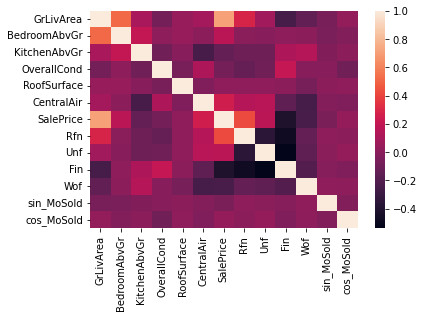

In [2]:
# YOUR CODE HERE
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns );

❓ Visualize the correlation between column pairs in a dataframe ❓

In [3]:
# YOUR CODE HERE
corr

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Rfn,Unf,Fin,Wof,sin_MoSold,cos_MoSold
GrLivArea,1.000000,0.519712,0.100093,-0.078781,0.040333,0.093068,0.707685,0.284965,0.081731,-0.252809,-0.150300,-0.067608,0.031901
BedroomAbvGr,0.519712,1.000000,0.198597,0.012980,0.044256,0.007872,0.168213,-0.005864,-0.008591,0.009897,0.006672,-0.061921,-0.030000
KitchenAbvGr,0.100093,0.198597,1.000000,-0.087001,-0.009661,-0.246797,-0.135907,-0.104644,-0.107387,0.118812,0.152515,-0.035697,0.008864
OverallCond,-0.078781,0.012980,-0.087001,1.000000,-0.065285,0.118969,-0.077856,-0.133177,-0.090723,0.203629,-0.009690,-0.010099,-0.092479
RoofSurface,0.040333,0.044256,-0.009661,-0.065285,1.000000,-0.039777,0.018008,0.017195,0.017565,0.001162,-0.069415,0.005885,0.017662
CentralAir,0.093068,0.007872,-0.246797,0.118969,-0.039777,1.000000,0.251328,0.142203,0.162085,-0.155776,-0.251471,-0.020429,-0.038481
SalePrice,0.707685,0.168213,-0.135907,-0.077856,0.018008,0.251328,1.000000,0.419678,0.169792,-0.410608,-0.236832,-0.055101,0.036300
Rfn,0.284965,-0.005864,-0.104644,-0.133177,0.017195,0.142203,0.419678,1.000000,-0.359384,-0.474129,-0.136604,0.010378,0.002865
Unf,0.081731,-0.008591,-0.107387,-0.090723,0.017565,0.162085,0.169792,-0.359384,1.000000,-0.536355,-0.154532,-0.002677,0.033818
Fin,-0.252809,0.009897,0.118812,0.203629,0.001162,-0.155776,-0.410608,-0.474129,-0.536355,1.000000,-0.203871,-0.015669,-0.040048


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [4]:
# YOUR CODE HERE
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
correlated_features = (corr_df.correlation > 0.9).sum() + (corr_df.correlation < -0.9).sum()


🧪 **Test your code**

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [6]:
X = data[['GrLivArea', 'RoofSurface', 'sin_MoSold', 'cos_MoSold', 'CentralAir', 'Rfn', 'Unf', 'Fin', 'Wof']]
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [7]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

X_scaled = MinMaxScaler().fit_transform(X)
linear_reg = LinearRegression()
test = cross_val_score(linear_reg, X_scaled,y, cv=10)

base_model_score = test.mean()

🧪 **Test your code**

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [9]:
# YOUR CODE HERE
from sklearn.inspection import permutation_importance
import numpy as np

log_model = LogisticRegression().fit(X, y)
permutation_score = permutation_importance(log_model, X, y, n_repeats=20)

importance_df = pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T) 

importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
0,GrLivArea,0.018596
7,Fin,0.010274
3,cos_MoSold,0.00863
2,sin_MoSold,0.007637
5,Rfn,0.007329
1,RoofSurface,0.005274
4,CentralAir,0.005
6,Unf,0.004589
8,Wof,0.001918


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [10]:
# YOUR CODE HERE
best_feature = 'GrLivArea'

🧪 **Test your code**

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [12]:
# YOUR CODE HERE

X = X.drop(columns = 'Wof' )

scores = cross_val_score(linear_reg, X, y, cv=5)

simplified_model_score = scores.mean()
simplified_model_score


0.6086274632749604

🧪 **Test your code**

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!